In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pickle

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [4]:
from analysis_utils import model_result

In [5]:
mlp_result = model_result('.','mlp_sigloss.pickle','mlp_qcdloss.pickle','embedded_mixture.pickle', 'embedded_qcd.pickle', 'bkg',bins=np.linspace(-100,100,2001))

In [6]:
tpr, fpr = mlp_result.get_tpr_fpr()

In [7]:
np.where(tpr<0.4)[0][0]

1001

In [8]:
mlp_result.get_threshold_at_tpr(0.2)

2.1000000000000085

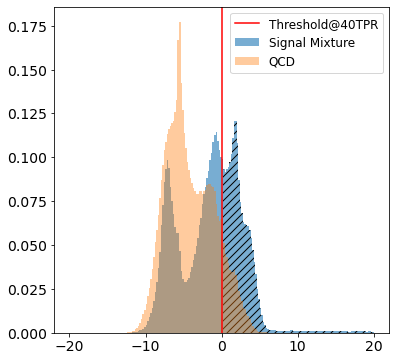

In [9]:
_, bins_sig, patches_sig = plt.hist(mlp_result.sigloss, bins=np.linspace(-20,20,201), density=True, alpha=0.6, label='Signal Mixture');
plt.hist(mlp_result.bkgloss, bins=np.linspace(-20,20,201), density=True, alpha=0.4, label='QCD');
plt.axvline(mlp_result.get_threshold_at_tpr(0.4), color='red', label='Threshold@40TPR')

for i in range(len(bins_sig)-1):
    #print(bins_h[i])
    if bins_sig[i] >= mlp_result.get_threshold_at_tpr(0.4):
        plt.setp(patches_sig[i], facecolor="C0",alpha=0.6,  hatch='///')

plt.legend(fontsize=12)

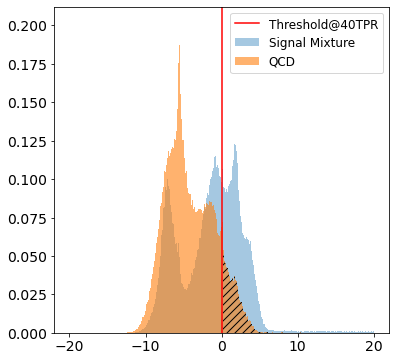

In [10]:
plt.hist(mlp_result.sigloss, bins=np.linspace(-20,20,1001), density=True, alpha=0.4, label='Signal Mixture');
_, bins_qcd, patches_qcd = plt.hist(mlp_result.bkgloss, bins=np.linspace(-20,20,1001), density=True, alpha=0.6, label='QCD');
plt.axvline(mlp_result.get_threshold_at_tpr(0.4), color='red', label='Threshold@40TPR')

for i in range(len(bins_qcd)-1):
    #print(bins_h[i])
    if bins_qcd[i] >= mlp_result.get_threshold_at_tpr(0.4):
        plt.setp(patches_qcd[i], facecolor="C1",alpha=0.6, hatch='///')
plt.legend(fontsize=12)

(0.0, 1.0)

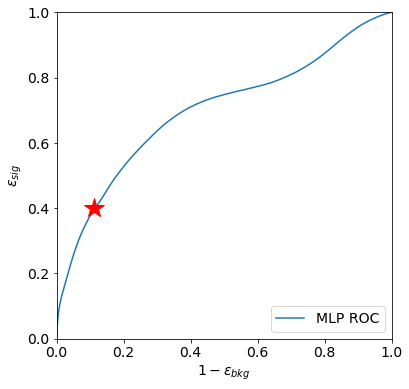

In [11]:
plt.plot(fpr,tpr,label='MLP ROC')


plt.plot(mlp_result.get_fpr_at_tpr(0.4), 0.4, marker="*", markersize=20, markeredgecolor="red", markerfacecolor="red")

plt.xlabel(r'$1-\epsilon_{bkg}$')
plt.ylabel(r'$\epsilon_{sig}$')

plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [12]:
from scipy import stats

def plot_kde(ax, points, color):

    xmin, xmax = [-1,0.8]
    ymin, ymax = [-0.5,0.85]
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = stats.gaussian_kde(points[np.random.permutation(points.shape[0])[:]].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    print(Z.max(),Z.min())
    CS = ax.contour(X,Y,Z,levels=[Z.max()/2.],colors=color, alpha=0.8)
    ax.set_xlim([-0.5,0.3])
    ax.set_ylim([0,0.35])
    return CS


In [13]:
sig_selected = np.where(mlp_result.sigloss>mlp_result.get_threshold_at_tpr(0.05))

bkg_selected = np.where(mlp_result.bkgloss>mlp_result.get_threshold_at_tpr(0.05))

In [14]:
mlp_result.sigloss.shape

(600000,)

In [15]:
sig_selected[0].shape[0]/600000

0.04998333333333333

(0.0, 0.35)

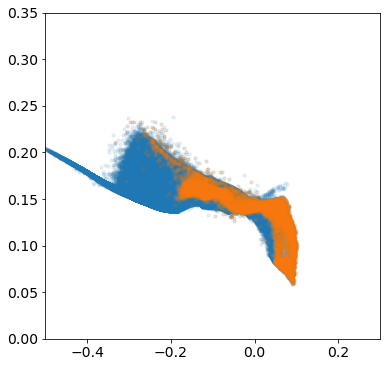

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(mlp_result.sigembedded[:,0],mlp_result.sigembedded[:,1],s=10,alpha=0.10,label='Signal Mixture')
ax.scatter(mlp_result.sigembedded[sig_selected,0],mlp_result.sigembedded[sig_selected,1],s=10,alpha=0.10,label='MLP selected')
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

In [17]:
mlp_result.sigembedded.shape

(600000, 2)

In [18]:
mlp_result.bkgembedded.shape

(747882, 2)

(0.0, 0.35)

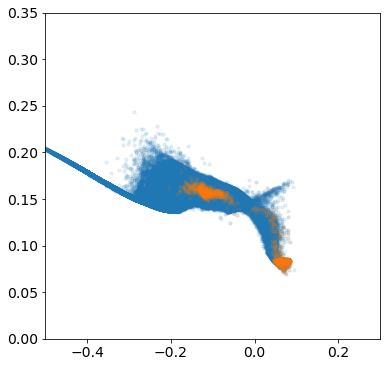

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(mlp_result.bkgembedded[:,0],mlp_result.bkgembedded[:,1],s=10,alpha=0.10,label='QCD')
ax.scatter(mlp_result.bkgembedded[bkg_selected,0],mlp_result.bkgembedded[bkg_selected,1],s=10,alpha=0.10,label='MLP selected')
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

In [23]:
hist, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[bkg_selected,0][0], mlp_result.bkgembedded[bkg_selected,1][0], (np.arange(-0.5,0.3,.01), np.arange(0,0.35,.01)))


In [25]:
hist.shape

(79, 34)

In [2]:
#import alphashape
#from descartes import PolygonPatch


In [23]:
points = mlp_result.bkgembedded[bkg_selected]

In [24]:
points

array([[-0.1360424 ,  0.16064183],
       [-0.12002945,  0.15547495],
       [ 0.06248336,  0.07696925],
       ...,
       [-0.08103248,  0.15632133],
       [ 0.07177123,  0.08450609],
       [ 0.08151761,  0.08451518]])

In [46]:
def multidim_cumsum(a):
    out = a[...,::1].cumsum(1)[...,::1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [47]:
a = np.array([[0,5],[100,120]])

In [48]:
multidim_cumsum(a)

array([[  0,   5],
       [100, 225]])

In [13]:
from sklearn.neighbors import KernelDensity

In [14]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[-0.5:0.3:xbins, 
                      0:0.35:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [31]:
mlp_result.bkgembedded.shape

(747882, 2)

In [59]:
#xx, yy, zz = kde2D(mlp_result.bkgembedded[bkg_selected][:,0], mlp_result.bkgembedded[bkg_selected][:,1], .005)
xx, yy, zz = kde2D(mlp_result.bkgembedded[np.random.permutation(747882)[:70000]][:,0], mlp_result.bkgembedded[np.random.permutation(747882)[:70000]][:,1], .005, kernel='gaussian')
#xx, yy, zz = kde2D(mlp_result.bkgembedded[bkg_selected][:,0], mlp_result.bkgembedded[bkg_selected][:,1], .005, kernel='gaussian')

/tmp/ipykernel_1295870/3855441204.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, zz)


(0.0, 0.35)

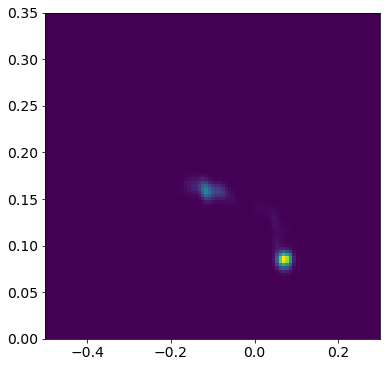

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(mlp_result.bkgembedded[:,0],mlp_result.bkgembedded[:,1],s=10,alpha=0.10,label='QCD')
ax.pcolormesh(xx, yy, zz)

ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

In [61]:
mlp_result.bkgembedded[:,0].shape

(747882,)

In [105]:
sig_hist_selected, xedges, yedges = np.histogram2d(mlp_result.sigembedded[sig_selected,0][0], mlp_result.sigembedded[sig_selected,1][0], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))
sig_hist_all, xedges, yedges = np.histogram2d(mlp_result.sigembedded[:,0], mlp_result.sigembedded[:,1], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))



#hist, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[bkg_selected,0][0], mlp_result.bkgembedded[bkg_selected,1][0], (np.linspace(-0.5,0.3,401), np.linspace(0,0.35,401)))
bkg_hist_selected, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[bkg_selected,0][0], mlp_result.bkgembedded[bkg_selected,1][0], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))
bkg_hist_all, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[:,0], mlp_result.bkgembedded[:,1], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))


In [106]:
np.where(np.where(bkg_hist_all>10, 1, 0).T == 1)[0].shape[0]
np.where(np.where(bkg_hist_selected>10, 1, 0).T == 1)[0].shape[0]

24

In [66]:
hist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
np.arange(-0.5,0.3,.01)

array([-5.0000000e-01, -4.9000000e-01, -4.8000000e-01, -4.7000000e-01,
       -4.6000000e-01, -4.5000000e-01, -4.4000000e-01, -4.3000000e-01,
       -4.2000000e-01, -4.1000000e-01, -4.0000000e-01, -3.9000000e-01,
       -3.8000000e-01, -3.7000000e-01, -3.6000000e-01, -3.5000000e-01,
       -3.4000000e-01, -3.3000000e-01, -3.2000000e-01, -3.1000000e-01,
       -3.0000000e-01, -2.9000000e-01, -2.8000000e-01, -2.7000000e-01,
       -2.6000000e-01, -2.5000000e-01, -2.4000000e-01, -2.3000000e-01,
       -2.2000000e-01, -2.1000000e-01, -2.0000000e-01, -1.9000000e-01,
       -1.8000000e-01, -1.7000000e-01, -1.6000000e-01, -1.5000000e-01,
       -1.4000000e-01, -1.3000000e-01, -1.2000000e-01, -1.1000000e-01,
       -1.0000000e-01, -9.0000000e-02, -8.0000000e-02, -7.0000000e-02,
       -6.0000000e-02, -5.0000000e-02, -4.0000000e-02, -3.0000000e-02,
       -2.0000000e-02, -1.0000000e-02,  4.4408921e-16,  1.0000000e-02,
        2.0000000e-02,  3.0000000e-02,  4.0000000e-02,  5.0000000e-02,
      

hist.shape

In [35]:
hist.shape

(79, 34)

In [39]:
np.amax(hist)

286.0

In [46]:
np.where(hist>2, 1, 0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

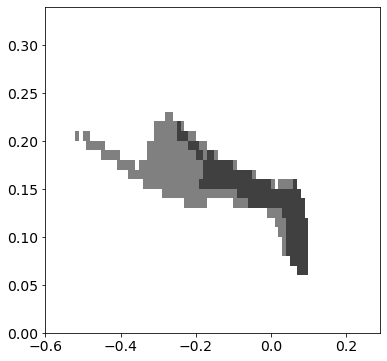

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.imshow(np.where(sig_hist_selected>10, 1, 0).T, origin='lower', extent=[-0.6, 0.29, 0, 0.34], cmap=plt.cm.binary,aspect='auto', alpha=0.5)
ax.imshow(np.where(sig_hist_all>10, 1, 0).T, origin='lower', extent=[-0.6, 0.29, 0, 0.34], cmap=plt.cm.binary,aspect='auto', alpha=0.5)

#ax.pcolormesh(np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01), np.where(hist_selected>10, 1, 0).T)
#ax.pcolormesh(np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01), np.where(hist_all>10, 1, 0).T)


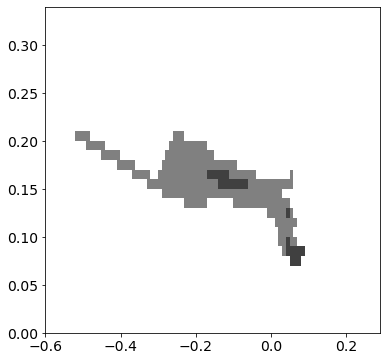

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.imshow(np.where(hist_selected>10, 1, 0).T, origin='lower', extent=[-0.6, 0.29, 0, 0.34], cmap=plt.cm.binary,aspect='auto', alpha=0.5)
ax.imshow(np.where(hist_all>10, 1, 0).T, origin='lower', extent=[-0.6, 0.29, 0, 0.34], cmap=plt.cm.binary,aspect='auto', alpha=0.5)

#ax.pcolormesh(np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01), np.where(hist_selected>10, 1, 0).T)
#ax.pcolormesh(np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01), np.where(hist_all>10, 1, 0).T)


In [103]:
np.where(np.where(sig_hist_all>10, 1, 0).T == 1)[0].shape[0]
np.where(np.where(sig_hist_selected>10, 1, 0).T == 1)[0].shape[0]

122

In [54]:
hist = hist / hist.sum()

In [113]:
tpr_thresholds = np.linspace(0., 1, 101)
tpr_thresholds = tpr_thresholds[1:]

In [114]:
area_tpr = []
area_fpr = []
for threshold in tpr_thresholds:
    sig_selected = np.where(mlp_result.sigloss>mlp_result.get_threshold_at_tpr(threshold))
    bkg_selected = np.where(mlp_result.bkgloss>mlp_result.get_threshold_at_tpr(threshold))
    sig_hist_selected, xedges, yedges = np.histogram2d(mlp_result.sigembedded[sig_selected,0][0], mlp_result.sigembedded[sig_selected,1][0], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))
    sig_hist_all, xedges, yedges = np.histogram2d(mlp_result.sigembedded[:,0], mlp_result.sigembedded[:,1], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))

    bkg_hist_selected, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[bkg_selected,0][0], mlp_result.bkgembedded[bkg_selected,1][0], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))
    bkg_hist_all, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[:,0], mlp_result.bkgembedded[:,1], (np.arange(-0.6,0.3,.01), np.arange(0,0.35,.01)))

    area_tpr.append(np.where(np.where(sig_hist_selected>10, 1, 0).T == 1)[0].shape[0]/np.where(np.where(sig_hist_all>10, 1, 0).T == 1)[0].shape[0])
    area_fpr.append(np.where(np.where(bkg_hist_selected>10, 1, 0).T == 1)[0].shape[0]/np.where(np.where(bkg_hist_all>10, 1, 0).T == 1)[0].shape[0])

(0.0, 1.0)

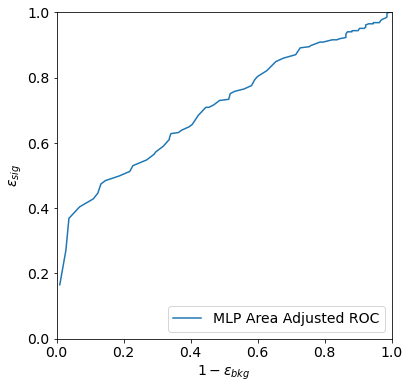

In [115]:
plt.plot(area_fpr,area_tpr,label='MLP Area Adjusted ROC')



plt.xlabel(r'$1-\epsilon_{bkg}$')
plt.ylabel(r'$\epsilon_{sig}$')

plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [55]:
n = 1000
t = np.linspace(0, hist.max(), n)
integral = ((hist >= t[:, None, None]) * hist).sum(axis=(1,2))

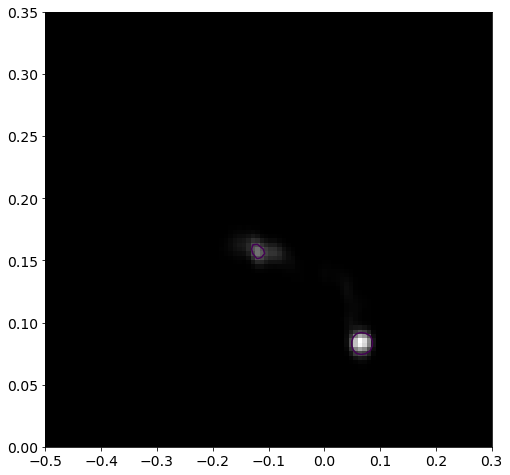

In [58]:
from scipy import interpolate
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([0.5]))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(hist.T, origin='lower', extent=[-0.5, 0.3, 0, 0.35], cmap="gray",aspect='auto')
ax.contour(hist.T, t_contours, extent=[-0.5, 0.3, 0, 0.35])
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])
fig.set_size_inches(8, 8)


In [93]:
import matplotlib
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.mgrid[-3:3:100j, -3:3:100j]
z1 = bivariate_normal(X, Y, .5, .5, 0., 0.)
z2 = bivariate_normal(X, Y, .4, .4, .5, .5)
z3 = bivariate_normal(X, Y, .6, .2, -1.5, 0.)
z = z1 + z2 + z3
z = z / z.sum()

n = 1000
t = np.linspace(0, z.max(), n)
integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

from scipy import interpolate
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
plt.imshow(z.T, origin='lower', extent=[-3,3,-3,3], cmap="gray")
plt.contour(z.T, t_contours, extent=[-3,3,-3,3])
plt.show()

ImportError: cannot import name 'bivariate_normal' from 'matplotlib.mlab' (/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/matplotlib/mlab.py)

In [ ]:
n = 1000
t = np.linspace(0, z.max(), n)
integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))


In [30]:
mlp_result.bkgembedded[bkg_selected,0][0].shape

(1719,)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   8.,  13.,   2.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  73.,  92.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1., 336.,  42.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   3.,   4., 115.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   7.,   2.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,  11.,   1.,   1.,   0.,   0.],
        [  6.,  22.,  14.,   9.,  24.,  12.,   2.,   1.,   0.,   0.],
        [327., 554.,  12.,  16.,   4.,   1.,   0.,   0.,   0.,   0.]]),
 array([-0.26767474, -0.23237794, -0.19708114, -0.16178434, -0.12648754,
        -0.09119074, -0.05589394, -0.02059714,  0.01469966,  0.04999646,
         0.08529326]),
 array([0.06974644, 0.0827891 , 0.09583175, 0.10887441, 0.12191706,
        0.13495972, 0.14800237, 0.16104503, 0.17408768, 0.187

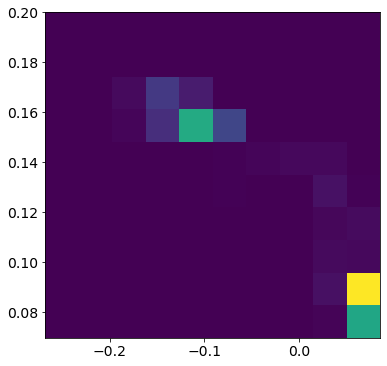

In [55]:
plt.hist2d(mlp_result.bkgembedded[bkg_selected,0][0], mlp_result.bkgembedded[bkg_selected,1][0])

In [63]:
hist, xedges, yedges = np.histogram2d(mlp_result.bkgembedded[bkg_selected,0][0], mlp_result.bkgembedded[bkg_selected,1][0], (np.linspace(-0.5,0.3,401), np.linspace(0,0.35,401)))


In [64]:
hist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
summed = multidim_cumsum(hist)

In [66]:
np.amax(summed)

1719.0

In [67]:
summed = summed/np.amax(summed)

In [68]:
summed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

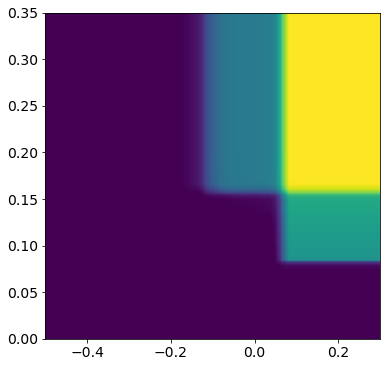

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.pcolormesh(np.linspace(-0.5,0.3,401),np.linspace(0,0.35,401), summed.T)


In [79]:
ax.get_ylim()

(0.0, 0.35)

In [80]:
xmin, xmax = [-0.5,0.3]
ymin, ymax = [0,0.35]
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [ ]:
cc = ax.contour(yy, xx, a.T, quantiles, colors='w')


In [ ]:
def plot_kde(ax, points, color):

    xmin, xmax = [-1,0.8]
    ymin, ymax = [-0.5,0.85]
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = stats.gaussian_kde(points[np.random.permutation(points.shape[0])[:]].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    print(Z.max(),Z.min())
    CS = ax.contour(X,Y,Z,levels=[Z.max()/2.],colors=color, alpha=0.8)
    ax.set_xlim([-0.5,0.3])
    ax.set_ylim([0,0.35])
    return CS


In [91]:
quantiles = np.quantile(summed, [0.20,0.40,0.5, 0.8, 0.6,0.9])


In [92]:
quantiles

array([0.        , 0.        , 0.        , 0.55322862, 0.01105294,
       1.        ])

In [ ]:
quantiles = np.quantile(summed, [0.50,0.90])
xx, yy = np.meshgrid(*tuple(ax.centers() for ax in htemp.axes()))
cc = ax.contour(yy, xx, a.T, quantiles, colors='w')
ax.clabel(cc, inline=1, fontsize=10)

(0.0, 0.35)

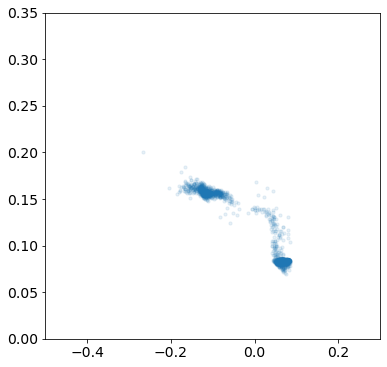

In [105]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(mlp_result.bkgembedded[:,0],mlp_result.bkgembedded[:,1],s=10,alpha=0.10,label='QCD')
ax.scatter(mlp_result.bkgembedded[bkg_selected,0],mlp_result.bkgembedded[bkg_selected,1],s=10,alpha=0.10,label='MLP selected')

ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

420.63479745223276 0.0


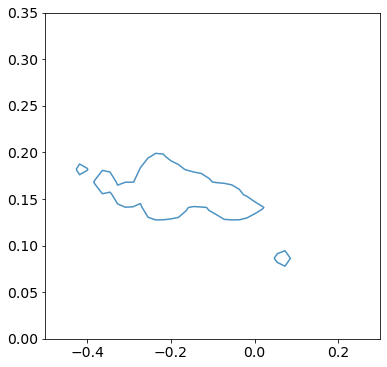

In [354]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS_sig_all = plot_kde(ax, mlp_result.sigembedded, 'C0')

431.60329492062687 0.0


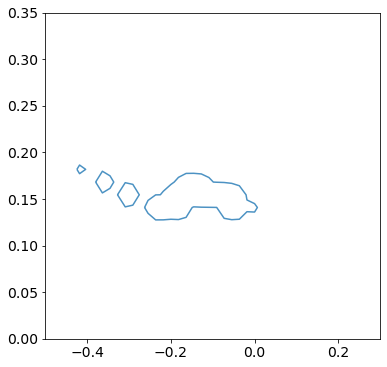

In [355]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS_bkg_all = plot_kde(ax, mlp_result.bkgembedded, 'C0')

531.0869315357045 0.0


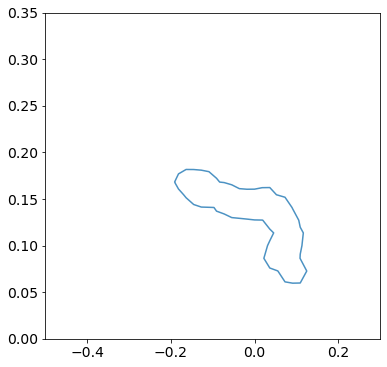

In [356]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS_sig_selected = plot_kde(ax, mlp_result.sigembedded[sig_selected], 'C0')

533.5915495867015 0.0


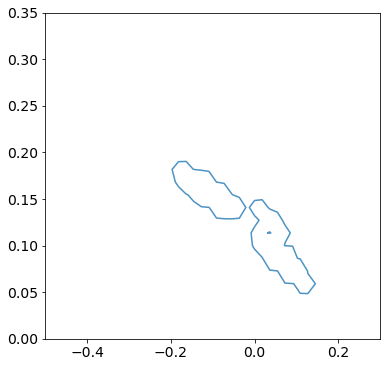

In [357]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS_bkg_selected = plot_kde(ax, mlp_result.bkgembedded[bkg_selected], 'C0')

(0.0, 0.35)

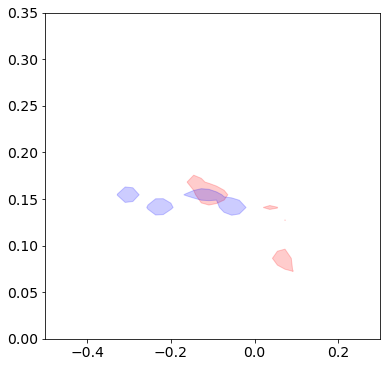

In [340]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_segments_sel = PathCollection(CS_sig_selected.collections[0].get_paths(), color='r', alpha=0.2)
line_segments_all = PathCollection(CS_sig_all.collections[0].get_paths(), color='b', alpha=0.2)
ax.add_collection(line_segments_sel)
ax.add_collection(line_segments_all)
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

(0.0, 0.35)

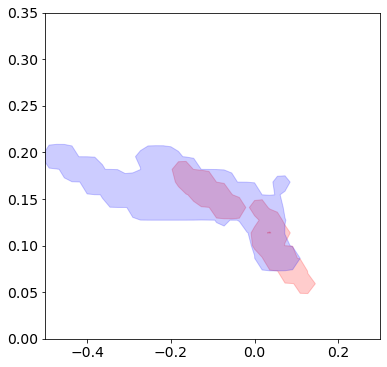

In [253]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_segments_sel = PathCollection(CS_bkg_selected.collections[0].get_paths(), color='r', alpha=0.2)
line_segments_all = PathCollection(CS_bkg_all.collections[0].get_paths(), color='b', alpha=0.2)
ax.add_collection(line_segments_sel)
ax.add_collection(line_segments_all)
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

In [254]:
def area(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

def total_area(CS):
    contour = CS.collections[0]
    tot_area = 0.
    for path in contour.get_paths():
        vs = path.vertices
        tot_area += area(vs)
    return tot_area

In [255]:
tpr_thresholds = np.linspace(0., 1, 21)

In [256]:
tpr_thresholds = tpr_thresholds[1:]

In [257]:
tpr_thresholds

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [258]:
bkg_area_all = total_area(CS_bkg_all)
sig_area_all = total_area(CS_sig_all)


In [259]:
bkg_area

0.02883126902562635

In [260]:
sig_area

0.03967732916709988

In [261]:
area_tpr = []
area_fpr = []
for threshold in tpr_thresholds:
    sig_selected = np.where(mlp_result.sigloss>mlp_result.get_threshold_at_tpr(threshold))
    bkg_selected = np.where(mlp_result.bkgloss>mlp_result.get_threshold_at_tpr(threshold))
    CS_sig_selected = plot_kde(ax, mlp_result.sigembedded[sig_selected], 'C0')
    CS_bkg_selected = plot_kde(ax, mlp_result.bkgembedded[bkg_selected], 'C0')
    sig_area_selected = total_area(CS_sig_selected)
    bkg_area_selected = total_area(CS_bkg_selected)
    area_tpr.append(sig_area_selected/sig_area_all)
    area_fpr.append(bkg_area_selected/bkg_area_all)

503.62606255021535 0.0
533.5915495867035 0.0
608.1429252875998 0.0
605.4014956989959 0.0
535.1012660272426 0.0
689.8749543732515 0.0
462.17498333514 0.0
662.7700597752668 0.0
383.98936207998594 0.0
539.3804351294905 0.0
427.7837304329312 0.0
523.1906664504869 0.0
455.193408439018 0.0
541.7642528993424 0.0
439.3089568534071 0.0
517.0842912259901 0.0
425.2002707417611 0.0
474.91655954753855 0.0
398.77052550522774 0.0
477.20888977829395 0.0
396.36834564663366 0.0
467.13984940726397 0.0
364.2335152013669 0.0
460.72839405968125 0.0
349.5716245327924 0.0
456.26577408649746 0.0
337.1886893702303 0.0
442.903123084451 0.0
349.2737399283092 0.0
460.7462047012924 0.0
323.330847012997 0.0
473.91665883406284 0.0
303.59452578040475 0.0
420.2866108289602 0.0
285.73821567810666 0.0
386.03058185769345 0.0
265.15808086299324 0.0
361.5044591945216 0.0
255.98006992968376 0.0
319.7719072503892 0.0


In [262]:
area_tpr

[0.3312599763892928,
 0.3204054081832723,
 0.30653467423764535,
 0.3002468717864806,
 0.3136067144187626,
 0.3238007370109469,
 0.3400158461825986,
 0.3410932498710076,
 0.3454186065438511,
 0.35546347134805434,
 0.3602858266102646,
 0.3647532519610586,
 0.3561818716123179,
 0.36112573966406425,
 0.36425497408626756,
 0.3886318231297763,
 0.4037569820847727,
 0.39880225486147286,
 0.3913381593852945,
 0.3880483275818951]

In [263]:
area_fpr

[0.3698410067795745,
 0.354994110869024,
 0.27106056946892704,
 0.2598072731467624,
 0.2865076473095771,
 0.29827621262378373,
 0.31104365485465935,
 0.32609929533506643,
 0.4255926151707896,
 0.44063026463968136,
 0.4404823682685013,
 0.43194887417520395,
 0.41772282747401274,
 0.41456791100062135,
 0.39440830033373586,
 0.3832318043179287,
 0.37322683979144206,
 0.36940819191666613,
 0.36533501252260936,
 0.35416046119062616]

(0.0, 1.0)

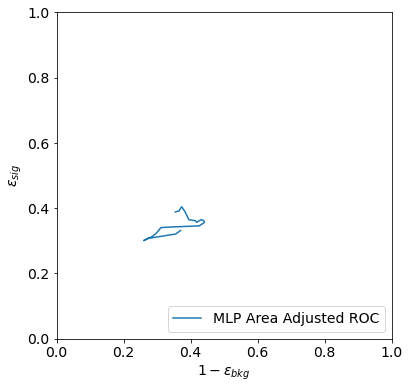

In [264]:
plt.plot(area_fpr,area_tpr,label='MLP Area Adjusted ROC')



plt.xlabel(r'$1-\epsilon_{bkg}$')
plt.ylabel(r'$\epsilon_{sig}$')

plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [21]:
with open('contour_mixture.pickle', 'rb') as handle:
    CS2 = pickle.load(handle)

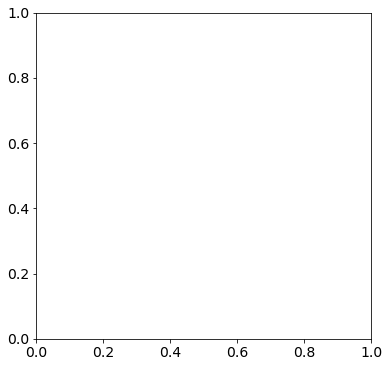

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

(0.0, 0.35)

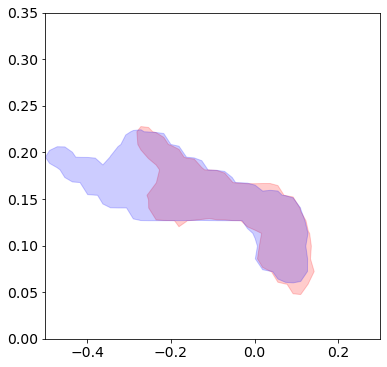

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_segments_sel = PathCollection(CS_selected.collections[0].get_paths(), color='r', alpha=0.2)
line_segments_all = PathCollection(CS_all.collections[0].get_paths(), color='b', alpha=0.2)
ax.add_collection(line_segments_sel)
ax.add_collection(line_segments_all)
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

In [58]:
ax.add_collection(line_segments)

In [60]:
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])

(0.0, 0.35)

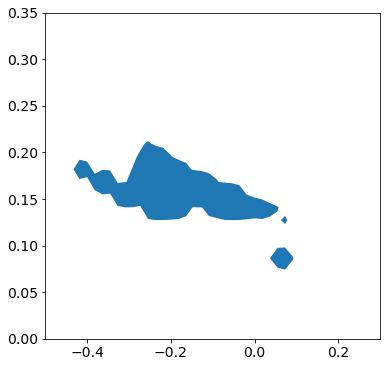

In [61]:
fig

1.0 0.0


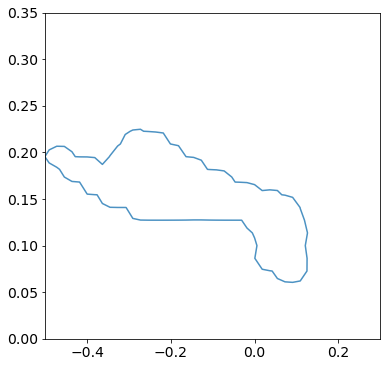

In [136]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS_all = plot_kde(ax, mlp_result.sigembedded, 'C0')

In [95]:
import pickle

In [96]:
with open('contour_mixture.pickle', 'wb') as handle:
    pickle.dump(CS, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
contour = CS.collections[0]

In [157]:
CS_selected

In [163]:
def total_area(CS):
    contour = CS.collections[0]
    tot_area = 0.
    for path in contour.get_paths():
        vs = path.vertices
        tot_area += area(vs)
    return tot_area

In [165]:
total_area(CS_all)

0.03950085508078824

In [164]:
total_area(CS_selected)

0.027910469925317264

In [162]:
def area(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

In [91]:
contour.get_paths()[1]

Path(array([[0.03677148, 0.08636364],
       [0.05454545, 0.09750871],
       [0.07272727, 0.0981039 ],
       [0.09090909, 0.08832917],
       [0.09288391, 0.08636364],
       [0.09090909, 0.08430526],
       [0.07272727, 0.0742048 ],
       [0.05454545, 0.076446  ],
       [0.03677148, 0.08636364]]), None)

In [90]:
contour.get_paths()[2]

Path(array([[0.06298246, 0.12727273],
       [0.07272727, 0.13190988],
       [0.07840917, 0.12727273],
       [0.07272727, 0.12320703],
       [0.06298246, 0.12727273]]), None)

In [84]:
vs0 = contour.get_paths()[0].vertices

In [88]:
vs1 = contour.get_paths()[1].vertices
vs2 = contour.get_paths()[2].vertices

In [86]:
area(vs0)

0.019226598086934485

In [87]:
area(vs1)

0.0008537466481221929

In [89]:
area(vs2)

6.712813572868574e-05

1.0 0.0


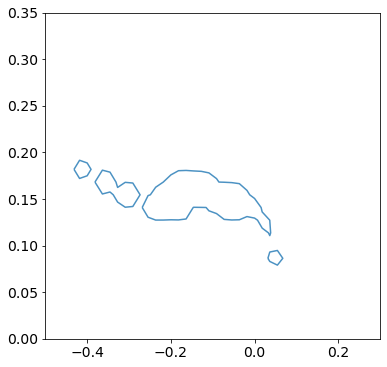

In [99]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS = plot_kde(ax, mlp_result.bkgembedded, 'C0')

In [100]:
with open('contour_qcd.pickle', 'wb') as handle:
    pickle.dump(CS, handle, protocol=pickle.HIGHEST_PROTOCOL)

(0.0, 0.35)

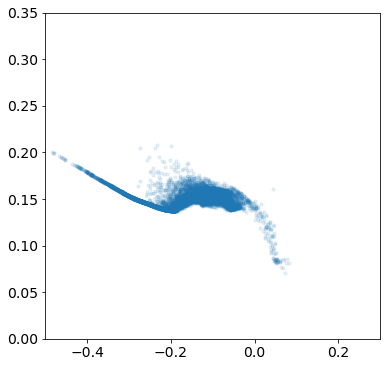

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(mlp_result.bkgembedded[:10000,0],mlp_result.bkgembedded[:10000,1],s=10,alpha=0.10,label='Signal Mixture')
ax.set_xlim([-0.5,0.3])
ax.set_ylim([0,0.35])